# HEALPpix an xarray DataSet

## Useful docs

https://healpy.readthedocs.io/en/latest/

In [1]:
# imports
from importlib import reload
import os
import numpy as np
import numpy.ma as ma

from matplotlib import pyplot as plt
import cartopy.crs as ccrs

import xarray

from remote_sensing.healpix import utils as hp_utils
from remote_sensing.healpix import rs_healpix
from remote_sensing.healpix import plotting as hp_plotting

In [2]:
#%matplotlib ipympl

# Load a DataSet

In [3]:
dfile = os.path.join(os.getenv('OS_RS'), 'PODAAC', 'H09-AHI-L3C-ACSPO-v2.90', 
                     '20250202200000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc')

In [4]:
ds = xarray.open_dataset(dfile)

## Chop it down

In [5]:
sst = ds.sea_surface_temperature.sel(lat=slice(23,18), 
                 lon=slice(127., 134.)).isel(time=0)
sst 

<xarray.DataArray 'sea_surface_temperature' (lat: 250, lon: 350)> Size: 350kB
[87500 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 1kB 127.0 127.0 127.1 127.1 ... 133.9 134.0 134.0
  * lat      (lat) float32 1kB 22.99 22.97 22.95 22.93 ... 18.05 18.03 18.01
    time     datetime64[ns] 8B 2025-02-02T20:00:00
Attributes:
    comment:                SST obtained by regression with buoy measurements...
    long_name:              sea surface sub-skin temperature
    source:                 NOAA
    standard_name:          sea_surface_subskin_temperature
    units:                  kelvin
    valid_max:              32767
    valid_min:              -32767
    grid_mapping:           crs
    coverage_content_type:  physicalMeasurement

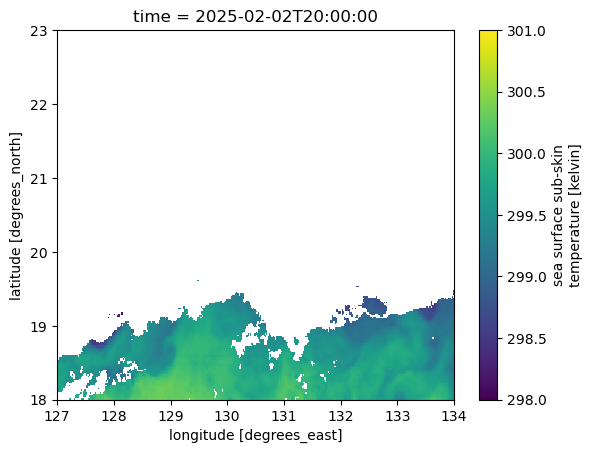

In [6]:
vmin=298.
vmax=301.
plt.clf()
sst.plot(vmin=vmin, vmax=vmax)
plt.show()

# Estimate nside

## Direct

In [7]:
sst.lat.data[0] - sst.lat.data[1]

np.float32(0.020000458)

In [8]:
reload(hp_utils)
nside, pix_deg = hp_utils.get_nside_from_angular_size(0.02)
nside, pix_deg

(2048, np.float64(0.028629053431811716))

## From the dataset

In [9]:
nside, pix_deg = hp_utils.get_nside_from_dataset(sst)
nside, pix_deg

(2048, np.float64(0.028629053431811716))

----

# Map a dataset

In [10]:
reload(rs_healpix)
rs_hpx = rs_healpix.RS_Healpix.from_dataset(sst)

In [11]:
rs_hpx.hp

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

## Plot

<Figure size 640x480 with 0 Axes>

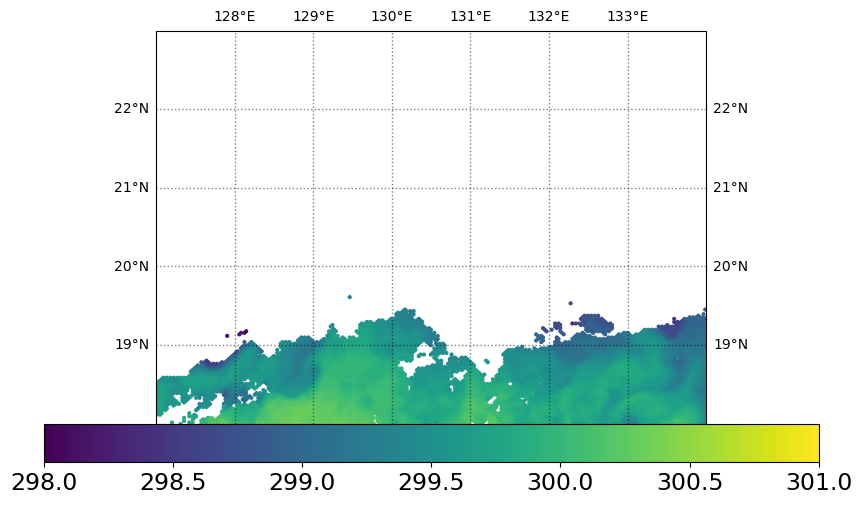

In [12]:
reload(hp_plotting)
plt.clf()
ax = hp_plotting.plot_rs_hp(rs_hpx, figsize=(10,6), vmin=vmin, vmax=vmax,
                          projection='platecarree', ssize=4.)
# Zoom in
ax.set_xlim(127.,134.)
ax.set_ylim(18.,23.)
plt.show()

----

# From datafile

In [21]:
reload(rs_healpix)
rs_hpx2 = rs_healpix.RS_Healpix.from_dataarray_file(dfile, 'sea_surface_temperature',
    lat_slice=slice(23,18),  lon_slice=slice(127., 134.), time_isel=0)
rs_hpx2

<RS_Healpix: nside=2048, npix=50331648
 file=20250202200000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc, var=sea_surface_temperature>